<center><h1>Titanic database Code Louisville Project</h1></center>
<center><h2>Project for Python class - January, 2019</h2></center>


<center>
    <h2/>
    <h5>Student name: John Vornberger</h5>
    <h6>Course: Python/Sqlite3</h6>
    <h6>OS Used: Windows 10</h6>
</center>
    

<h4>Other necessary evils:</h4>
<p>
    Github Repository: <bold>jv30344/cl-titanic</bold><br>
    Default Directory: C:/CL-Project <br>
    Name of script to run: main_flow.ipynb
    <br>
    Default directory is set to C:/CL-Project 
<br>    
<ol>
    <li> Python </li>
    <li> Pandas</li>
    <li> Anaconda</li>
    <li> Jupyter Notebook</li>
    <li> Sqlite3</li>
    <li> matplotlib (for graphs)</li>
    <li> seaborn (also for graphs)</li>
</ol>
</p>
<br>
<p>
    This project is based on data from several different sources containing passenger data from the Titanic.  I've worked       hard studying the data from several sources along with merging corrections and updates into my database.  It's still       not quite complete, but it'll do for this project.
</p>


In [1]:
#
# Pandas
import pandas as pd
#
# Matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
#
# Seaborn
import seaborn as sns
#
# sqlite
import sqlite3 as sql
#

<h3>Connect to the database</h3>

In [2]:
db = "C:/CL-Project/Titanic.db"
print("Database - " + db)
#
# Create database connection
#
conn = sql.connect(db)

Database - C:/CL-Project/Titanic.db


<h3>Pull the data from the database</h3>

In [3]:
#
# Queries
#
sql_query_all = '''
SELECT *
FROM titanic_passenger_list;
'''

sql_query_pass_only = '''
SELECT * 
FROM titanic_passenger_list
where not crew;
'''

In [4]:
#
# Display all of the rows in the database
# 
df = pd.read_sql_query(sql_query_all, conn)
df
#

,passenger_id,lastname,firstname,other_info,age,gender,hometown,boarded,lifeboat,body,pclass,survived,passenger,crew,crew_responsibility
0,1,Allen,Miss Elisabeth Walton,,29.00,F,,Southampton,,,1,1,1,0,
1,2,Allison,Mr Hudson Joshua Creighton,,30.00,M,,Southampton,,,1,0,1,0,
2,3,Allison,Mrs Bessie Waldo,,25.00,F,,Southampton,,,1,0,1,0,
3,4,Allison,Miss Helen Loraine,,2.00,F,,Southampton,,,1,0,1,0,
4,5,Allison,Master Hudson Trevor,,0.91,M,,Southampton,,,1,1,1,0,
5,6,Anderson,Mr Harry,,47.00,M,,Southampton,,,1,1,1,0,
6,7,Andrews,Miss Kornelia Theodosia,,62.00,F,,Cherbourg,,,1,1,1,0,
7,8,Andrews,Mr Thomas,,39.00,M,,Belfast,,,1,0,1,0,
8,9,Appleton,Mrs Charlotte,,53.00,F,,Southampton,,,1,1,1,0,
9,10,Artagaveytia,Mr Ramon,,71.00,M,,Cherbourg,,,1,0,1,0,


In [5]:
#
# Display all passengers and not crew members
# 
#df = pd.read_sql_query(sql_query_all, conn)
#df
#

In [9]:
### Change some of the data types for helping with graphing the data
#
# Define appropriate data types for display
#
df["gender"] = df["gender"].astype(str)         # Gender - String (M/F)
df["survived"] = df["survived"].astype(bool)    # survived - Boolean: 0 = Did not survive, 1 = Survived
df["age"] = df["age"].astype(int)               # Age - 0-100 is valid
df["passenger"] = df["passenger"].astype(bool)  # Passenger/Crewmember 0 = Crew member,  1 = Passenger
df["pclass"] = df["pclass"].astype(int)         # Passenger Class 0=Crew member, 1=1st Class, 2=2nd Class, 3=3rd Class

In [7]:
# Scatterplot arguments
#sns.lmplot(x='survived', y='pclass', data=df,
#           fit_reg='false', 
#           hue='gender')
#
#           xlim=(0,1),
#           ylim=(0,3),
#           xticks=[0,1],
#           yticks=[0,1,2,3])

In [8]:
# matplotlib
#plt.ylim[0, None]
#plt.xlim[0, None]

<center><h1>Swarm Plot graph</h1></center>

<h3>Explanation of graph</h3>
<h4>This is graph showing gender</h4>
    <ul>
        <li>The crew (pclass 0) had more male survivors than female</li>
        <li>According to my data, only 6 first class female passengers (out of a total of 327) perished in the sinking</li>
    </ul>
    <br>

In [ ]:
# This runs for a while.  Please be patient

sns.swarmplot(x='pclass', y='gender', hue='survived', data=df)

sns.countplot(x="pclass", hue="survived", data=df)

In [11]:
#
# Display the raw data showing how many died and how many survived.  
#
df.survived.value_counts()

False    1163
True     1021
Name: survived, dtype: int64

In [12]:
df.gender.value_counts()

M    1709
F     475
Name: gender, dtype: int64

In [13]:
df.pclass.value_counts()

0    866
3    709
1    325
2    284
Name: pclass, dtype: int64

In [14]:
df.passenger.value_counts()


True     1318
False     866
Name: passenger, dtype: int64

In [15]:
df.crew.value_counts()

0    1318
1     866
Name: crew, dtype: int64

AttributeError: 'FacetGrid' object has no attribute 'set_title'

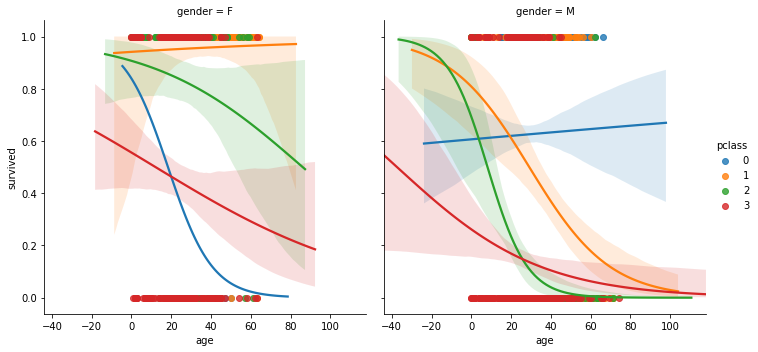

In [17]:
# sns.lmplot(x="age", y="survived", col="gender", hue="pclass", data=df, logistic=True).set_title("Graph showing survival by gender/age")

C:\Users\bing\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


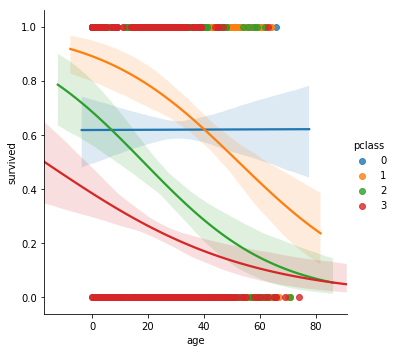

In [18]:
sns.lmplot(x="age", y="survived", hue="pclass", data=df, logistic=True)
# sns.barplot(x="age", y="survived", hue="pclass", data=df)

C:\Users\bing\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\bing\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
C:\Users\bing\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\bing\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\bing\Anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:879: RuntimeWarning: overflow encountered in true_divide
  endog_mu = self._clean(endog / mu)


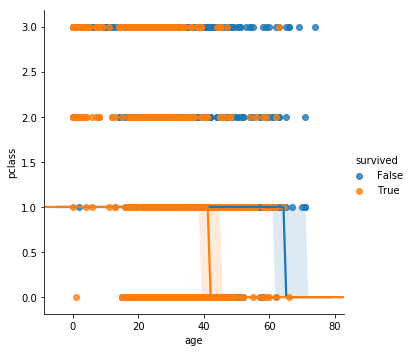

In [19]:
# sns.lmplot(x="age", y="pclass", hue="survived", data=df, logistic=True)